# predicting the price of avacados

### About the data-
> The dataset represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

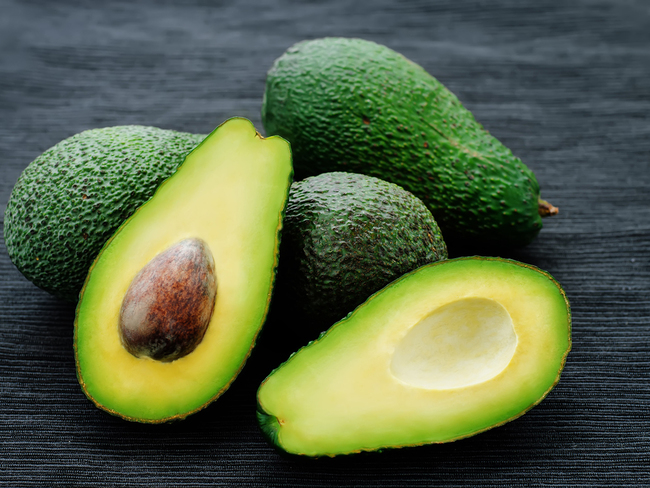

In [1]:
# disply image using python
from IPython.display import Image
url=(r"C:\Users\Prashanth\Desktop\Naresh_it\MachineLearning\project\avacado\Fruti.jpg")
Image(url,height=300,width=400)

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
# importing dataset
data=pd.read_csv(r"C:\Users\Prashanth\Desktop\Naresh_it\MachineLearning\project\avacado\avocado.csv",index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [3]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


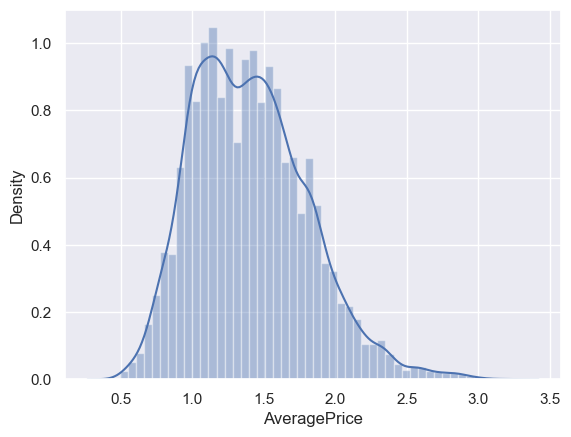

In [4]:
sns.distplot(data['AveragePrice']);

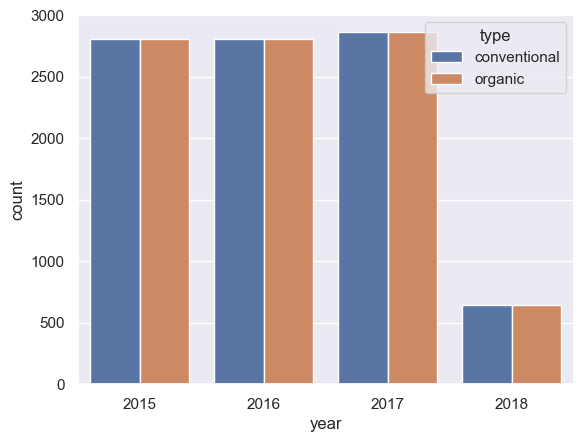

In [5]:
sns.countplot(x='year',data=data,hue='type');

In [6]:
data.year.value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

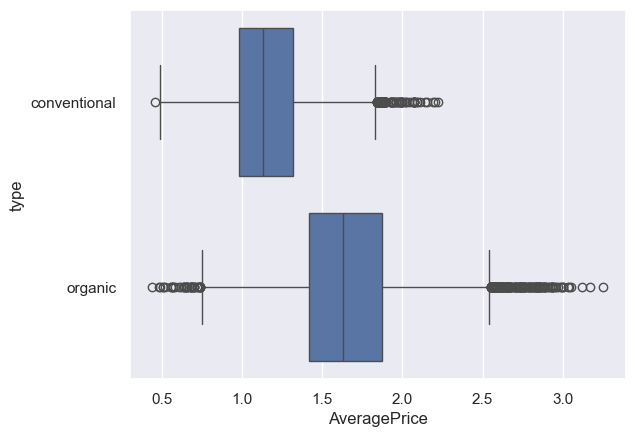

In [7]:
sns.boxplot(y='type',x='AveragePrice',data=data);

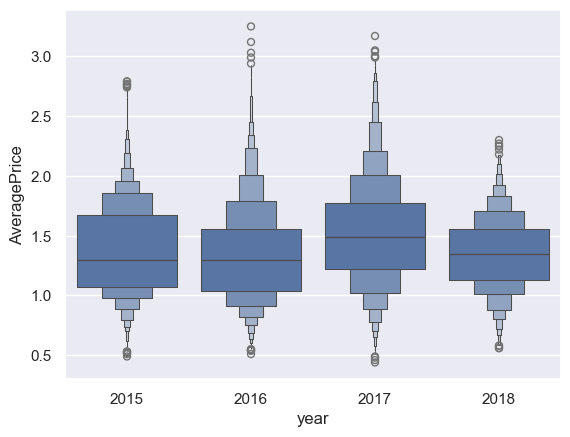

In [8]:
data.year=data.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=data);

# Dealing with categorical features

In [13]:
data['type']= data['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
data.Date = data.Date.apply(pd.to_datetime)
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [14]:
data.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico,FEB
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico,JAN
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico,JAN
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico,JAN
11,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,WestTexNewMexico,JAN


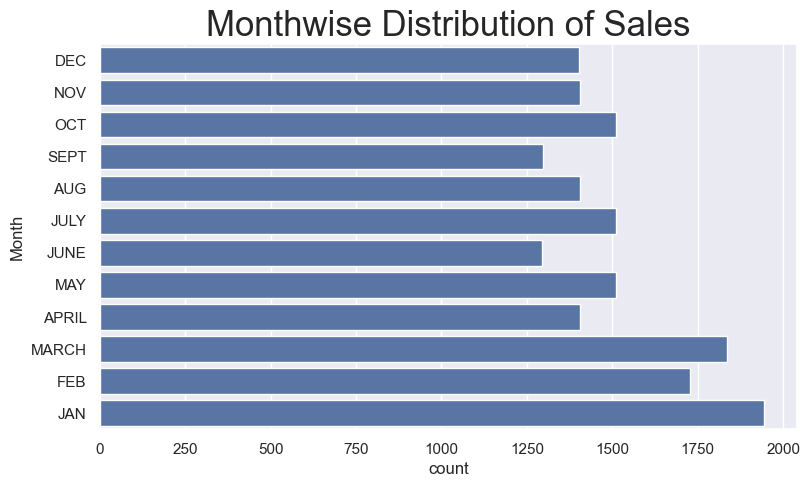

In [15]:
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

# preparing data for ML models

In [19]:
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = data['AveragePrice']

# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [21]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [22]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

# Deep neural network

In [25]:
# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)

#importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#creating model
model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [31]:
model.fit(
    x=X_train.values.astype('float32'),
    y=y_train.values.astype('float32'),
    validation_data=(
        X_val.values.astype('float32'),
        y_val.values.astype('float32')
    ),
    batch_size=100,
    epochs=150,
    callbacks=[early_stop]
)


Epoch 1/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.2967 - val_loss: 0.0999
Epoch 2/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1186 - val_loss: 0.0804
Epoch 3/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0991 - val_loss: 0.0587
Epoch 4/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0896 - val_loss: 0.0510
Epoch 5/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0812 - val_loss: 0.0429
Epoch 6/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0718 - val_loss: 0.0441
Epoch 7/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0685 - val_loss: 0.0458
Epoch 8/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0649 - val_loss: 0.0349
Epoch 9/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0595 - val_loss: 0.0367
Epoch 10/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0559 - val_loss: 0.0339
Epoch 11/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0527 - val_loss: 0.0325
Epoch 12/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0

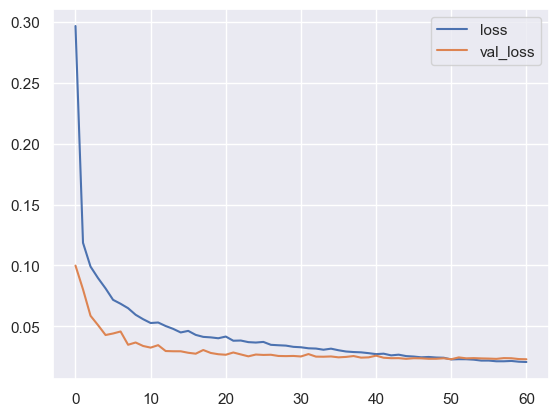

In [32]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [33]:
dnn_pred = model.predict(X_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# results table

In [36]:
results.loc['Deep Neural Network'] = [
    round(mean_absolute_error(y_test, dnn_pred), 3),
    round(mean_squared_error(y_test, dnn_pred), 3),
    round(r2_score(y_test, dnn_pred), 3)
]
results

,MAE,MSE,R2-score
Linear Regression,0.185,0.061,0.633
Decision Tree,0.131,0.042,0.746
Random Forest,0.099,0.021,0.875
Support Vector Machines,0.120,0.030,0.820
K-nearest Neighbors,0.102,0.025,0.849
XGBoost,0.096,0.018,0.893
Deep Neural Network,0.111,0.025,0.849


In [37]:
f"10% of mean of target variable is {np.round(0.1 * data.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [38]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.096000,0.018000,0.893000
Random Forest,0.099000,0.021000,0.875000
K-nearest Neighbors,0.102000,0.025000,0.849000
Deep Neural Network,0.111000,0.025000,0.849000
Support Vector Machines,0.120000,0.030000,0.820000
Decision Tree,0.131000,0.042000,0.746000
Linear Regression,0.185000,0.061000,0.633000


## Conclusion:

* Except linear regression model, all other models have mean absolute error less than 10% of mean of target variable.
* For this dataset, XGBoost and Random Forest algorithms have shown best results.